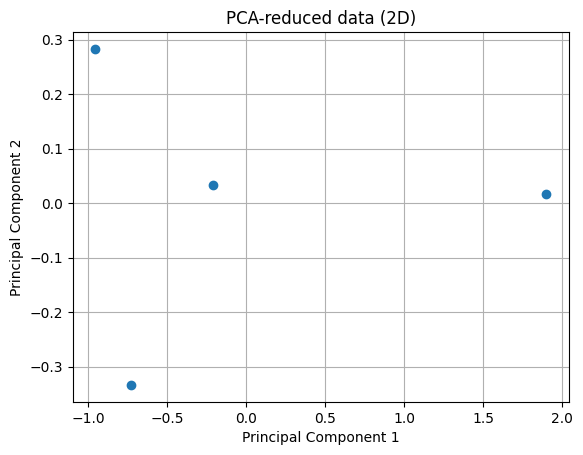

In [139]:
import numpy as np

def pca(X, num_components):
    X_meaned = X - np.mean(X, axis=0)

    cov_matrix = np.cov(X_meaned, rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, sorted_indices]
    eigenvalues = eigenvalues[sorted_indices]

    eigenvectors_subset = eigenvectors[:, :num_components]

    X_reduced = np.dot(X_meaned, eigenvectors_subset)

    return X_reduced



X = np.array([
    [2.5, 2.4, 1.2],
    [0.5, 0.7, 0.8],
    [2.2, 2.9, 1.5],
    [1.9, 2.2, 1.3]
])

X_pca = pca(X, num_components=2)


import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA-reduced data (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
df = pd.read_csv("car details v4.csv")
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [141]:
df = df.drop(['Location', 'Owner', 'Color', 'Model'], axis=1)
df = df.dropna()

print(df['Drivetrain'].unique())
df = df[df['Max Power'].str.contains('bhp') & df['Max Power'].str.contains('rpm')]
df = df[df['Max Torque'].str.contains('Nm') & df['Max Power'].str.contains('rpm')]


def multiply_bhp_rpm(power_str):
    try:
        power_str.replace(" ", "")
        bhp_part, rpm_part = power_str.split('@')
        bhp_val = float(bhp_part.replace('bhp', '').strip())
        rpm_val = float(rpm_part.replace('rpm', '').strip())
        return bhp_val * rpm_val
    except Exception as e:
        print(f"Error processing '{power_str}':", e)
        return None

def multiply_torque(torque_str):
    try:
        torque_str.replace(" ", "")
        Nm_part, rpm_part = torque_str.split('@')
        Nm_val = float(Nm_part.replace('Nm', '').strip())
        rpm_val = float(rpm_part.replace('rpm', '').strip())
        return Nm_val * rpm_val
    except Exception as e:
        print(f"Error processing '{torque_str}':", e)
        return None


df['Max Power'] = df['Max Power'].apply(multiply_bhp_rpm)
df['Max Torque'] = df['Max Torque'].apply(multiply_torque)


df['FWD'] = (df["Drivetrain"] == 'FWD').astype(int)
df['RWD'] = (df["Drivetrain"] == 'RWD').astype(int)
df['AWD'] = (df["Drivetrain"] == 'AWD').astype(int)

df = df.drop("Drivetrain", axis=1)

['FWD' 'RWD' 'AWD']


In [142]:
df['Seller Indiv'] = (df["Seller Type"] == 'Individual').astype(int)
df['Seller Corporate'] = (df["Seller Type"] == 'Corporate').astype(int)
df['Seller Commercial'] = (df["Seller Type"] == 'Commercial Registration').astype(int)

df = df.drop("Seller Type", axis=1)
